In [1]:
import os
import glob
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
os.getcwd()

'/home/users/jguiang/projects/VBSHWW/studies/taus'

In [3]:
def load_babies(baby_dir, branches=[], flatten=True):
    if baby_dir[-1] == "/":
        baby_dir = baby_dir[:-1]
    dfs = []
    for baby in glob.glob(baby_dir+"/*.root"):
        sample_name = baby.split(".root")[0].split("/")[-1]
        # Retrieve TTree
        f = uproot.open(baby)
        tree = f.get("variable")
        temp_df = tree.pandas.df(branches=branches, flatten=flatten)
        temp_df["sample_name"] = sample_name
        dfs.append(temp_df)

    return pd.concat(dfs)

In [4]:
tau_df = load_babies("../../hadds/taus_Run2", branches=["good_tau*", "event_weight", "is_mu_tau", "vbs_Mjj"])

# Drop p4 column
tau_df.drop(columns=["good_taus_p4"], inplace=True)
# Rename pt, eta, phi, M columns
columns = tau_df.filter(regex="good_taus_p4.fCoordinates*").columns
renames = "tau_"+columns.str.split(".f").str.get(-1).str.lower()
tau_df.rename(columns=dict(zip(columns, renames)), inplace=True)
# Rename good_taus_* -> taus_* for brevity
columns = tau_df.filter(regex="good_taus_*").columns
renames = "tau_"+columns.str.split("good_taus_").str.get(-1)
tau_df.rename(columns=dict(zip(columns, renames)), inplace=True)

tau_df["is_signal"] = (tau_df.sample_name == "vbshww")

# ONLY IF USING 2017 SIGNAL ALONE
tau_df.loc[tau_df.is_signal, "event_weight"] = tau_df[tau_df.is_signal].event_weight*137.421/41.529

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [5]:
lep_df = load_babies("../../hadds/mainAnalysis_Run2", branches=["good_el*", "event_weight", "is_mu_el", "vbs_Mjj"])

# Drop p4 column
lep_df.drop(columns=["good_el_p4"], inplace=True)
# Rename pt, eta, phi, M columns
columns = lep_df.filter(regex="good_el_p4.fCoordinates*").columns
renames = "el_"+columns.str.split(".f").str.get(-1).str.lower()
lep_df.rename(columns=dict(zip(columns, renames)), inplace=True)

lep_df["is_signal"] = (lep_df.sample_name == "vbshww")

# ONLY IF USING 2017 SIGNAL ALONE
lep_df.loc[lep_df.is_signal, "event_weight"] = lep_df[lep_df.is_signal].event_weight*137.421/41.529

In [6]:
tau_df.head(20)

tau_pt   tau_eta   tau_phi     tau_m  tau_pdgid  \
entry subentry                                                        
0     0          91.949928 -1.145020 -2.732422  0.524414        -15   
1     0          62.783562 -0.151855 -1.536133  0.791992         15   
2     0          99.280090 -0.659790  2.240723  1.021484        -15   
3     0          52.547527 -1.401611 -0.206848  0.985840        -15   
4     0         272.349274  0.365356 -1.554932  1.056641        -15   
5     0         155.584122 -0.881958 -0.816895  0.535156        -15   
6     0          26.757782  1.597900 -1.408447  0.139526         15   
0     0         158.838287  0.910522  1.082275  1.359375         15   
1     0          32.044277 -1.745605 -2.529785  0.680664        -15   
2     0          96.262871 -1.134277 -1.299561  0.139526        -15   
3     0          29.013956  0.587402  1.432617  0.139526        -15   
4     0          30.046268 -1.366455 -1.541260  0.139526         15   
5     0          26.693562  0.951172  0.803223  1.102539        -15   
6     0         245.844009  0.532471  0.068207  1.283203        -15   
7     0          26.145819  0.673218 -0.846680  1.046875        -15   
8     0          57.142639  0.960205 -2.162109  0.139526        -15   
9     0          46.520912 -0.061020  1.619873  1.129883        -15   
10    0          38.362667  1.054199  0.389771  0.834473        -15   
11    0          45.878681  2.113770  0.631104  0.139526        -15   
12    0         162.106232  2.087891  0.767578  1.144531        -15   

                tau_tight  tau_jetIdx  tau_genPartFlav  event_weight  \
entry subentry                                                         
0     0                 1           4                5      0.079833   
1     0                 1           3                5      0.079833   
2     0                 1           1                5      0.020583   
3     0                 1           7                5      0.030932   
4     0                 1           0                5      0.030932   
5     0                 1           2                5      0.030932   
6     0                 1           3                5      0.030932   
0     0                 1           2                5      0.000024   
1     0                 1           6                5      0.000024   
2     0                 1           3                5      0.000024   
3     0                 1           5                5      0.000024   
4     0                 1           3                5      0.000024   
5     0                 1           4                5      0.000024   
6     0                 1           0                5      0.000024   
7     0                 1           5                5      0.000024   
8     0                 1           3                5      0.000024   
9     0                 1           3                5      0.000024   
10    0                 1           6                5      0.000024   
11    0                 1           3                5      0.000024   
12    0                 1           1                5      0.000024   

                is_mu_tau      vbs_Mjj sample_name  is_signal  
entry subentry                                                 
0     0             False   691.828308          wz      False  
1     0             False  1542.534668          wz      False  
2     0             False   621.565491          wz      False  
3     0             False  1355.692505          wz      False  
4     0              True   762.039551          wz      False  
5     0              True   838.723206          wz      False  
6     0             False  1789.309937          wz      False  
0     0              True  1412.302734      vbshww       True  
1     0              True  4651.111816      vbshww       True  
2     0             False  4270.297852      vbshww       True  
3     0             False  1037.491699      vbshww       True  
4     0             False  1476.522461  

In [7]:
lep_df.head(20)

el_pt    el_eta    el_phi      el_m  event_weight  \
entry subentry                                                           
0     0          39.382633 -1.630371 -1.855225  0.022186      0.549658   
2     0          37.130871 -0.092896 -1.832520  0.010902      0.566667   
3     0          70.849411 -0.690552 -2.186035 -0.027191      0.566667   
6     0         104.139603  0.661377 -1.008789  0.028107      0.126022   
7     0         144.627121  1.031006  3.096191 -0.041656      0.126022   
9     0         165.470627 -2.468262  1.286133 -0.247925      0.126022   
10    0          37.483505  1.587158  0.463013 -0.028061      0.126022   
12    0          68.068161 -0.632935  2.978516  0.030457      0.126022   
13    0          46.659515  0.614746  1.535156 -0.011436      0.126022   
14    0          40.953999  1.710449 -1.701172  0.029724      0.126022   
15    0          96.709808  1.340332  2.499023  0.025116      0.126022   
18    0          27.123301 -0.451965 -2.034668 -0.008369      0.126022   
19    0          75.742371 -1.216797 -2.057617  0.014359      0.126022   
20    0         140.070724  0.902344 -3.130859 -0.040802      0.126022   
25    0         144.627121  1.031006  3.096191 -0.041656      0.126022   
27    0          40.397453  1.838379 -0.813721 -0.020309      0.126022   
31    0         110.565445  1.247314 -2.824707  0.087769      0.126022   
35    0         133.689072  2.432617  0.208527 -0.261230      0.134518   
36    0          42.746681  0.073944  2.286133  0.007782      0.134518   
37    0          31.916164 -1.720459  1.232178 -0.031555      0.134518   

                is_mu_el      vbs_Mjj sample_name  is_signal  
entry subentry                                                
0     0             True   653.719177        tt1l      False  
2     0             True  1374.787476        tt1l      False  
3     0             True   840.738159        tt1l      False  
6     0             True   604.060547        tt1l      False  
7     0             True  1052.746216        tt1l      False  
9     0             True  2102.673340        tt1l      False  
10    0             True   728.381104        tt1l      False  
12    0             True  1227.825562        tt1l      False  
13    0             True   944.972290        tt1l      False  
14    0             True   632.296814        tt1l      False  
15    0             True   570.793579        tt1l      False  
18    0             True  3501.780762        tt1l      False  
19    0             True   811.197876        tt1l      False  
20    0             True  2241.406250        tt1l      False  
25    0             True  1052.746216        tt1l      False  
27    0             True   956.107544        tt1l      False  
31    0             True   991.454529        tt1l      False  
35    0             True  1511.351318        tt1l      False  
36    0             True   909.157043        tt1l      False  
37    0             True   555.926575        tt1l      False

In [8]:
def plot_S_vs_B(df, var, sig_selection, bkg_selections, sig_label="sig", bkg_labels=[], bkg_order=[],
                bins=None, axes=None, normalized=True):
    if not axes:
        fig, axes = plt.subplots()
    
    # Get background information
    bkg_data = []
    bkg_weights = []
    bkg_integrals = []
    bkg_labels_with_integrals = []
    for i, bkg_selection in enumerate(bkg_selections):
        bkg_data.append(np.clip(df[bkg_selection][var], bins[0], bins[-1]))
        bkg_weights.append(np.clip(df[bkg_selection].event_weight, bins[0], bins[-1]))
        if i < len(bkg_labels):
            bkg_integrals.append(np.sum(df[bkg_selection].event_weight))
            bkg_labels_with_integrals.append(
                "{0} ({1:0.1f} evts)".format(bkg_labels[i], bkg_integrals[-1])
            )
        else:
            bkg_labels_with_integrals.append(
                "{:0.1f} evts".format(np.sum(df[bkg_selection].event_weight))
            )
    # Sort backgrounds by integral if there are multiple
    if len(bkg_data) > 1:
        # Convert to numpy arrays
        bkg_data = np.array(bkg_data)
        bkg_weights = np.array(bkg_weights)
        bkg_labels_with_integrals = np.array(bkg_labels_with_integrals)
        # Sort numpy arrays
        if len(bkg_order) == len(bkg_data):
            bkg_data = bkg_data[bkg_order]
            bkg_weights = bkg_weights[bkg_order]
            bkg_labels_with_integrals = bkg_labels_with_integrals[bkg_order]
        else:
            bkg_integrals = np.array(bkg_integrals)
            bkg_sort_map = bkg_integrals.argsort()[::-1]
            bkg_data = bkg_data[bkg_sort_map]
            bkg_weights = bkg_weights[bkg_sort_map]
            bkg_labels_with_integrals = bkg_labels_with_integrals[bkg_sort_map]
        
    # Plot background
    axes.hist(
        bkg_data,
        weights=bkg_weights,
        alpha=0.75,
        bins=bins,
        density=normalized,
        label=bkg_labels_with_integrals,
        stacked=True
    );
    if type(sig_selection) != type(None):
        # Plot signal
        axes.hist(
            np.clip(df[sig_selection][var], bins[0], bins[-1]),
            weights=np.clip(df[sig_selection].event_weight, bins[0], bins[-1]),
            color="r",
            alpha=0.75,
            bins=bins,
            density=normalized,
            label="{0} ({1:0.5f} evts)".format(sig_label, np.sum(df[sig_selection].event_weight)),
            histtype="step",
            linewidth=2
        );
    # Format axes
    axes.xaxis.set_minor_locator(AutoMinorLocator())
    axes.set_ylim(bottom=0.);
    axes.legend(prop={"size": 16});
    if normalized:
        axes.set_ylabel(r"a.u.", size=20);
    else:
        axes.set_ylabel(r"Counts", size=20);
    return

In [9]:
tau_sig_selection = tau_df.is_signal
tau_bkg_selections = []
tau_bkg_labels = []
for sample_name in tau_df[~tau_df.is_signal].sample_name.unique():
    tau_bkg_selections.append(tau_df.sample_name == sample_name)
    tau_bkg_labels.append(sample_name)

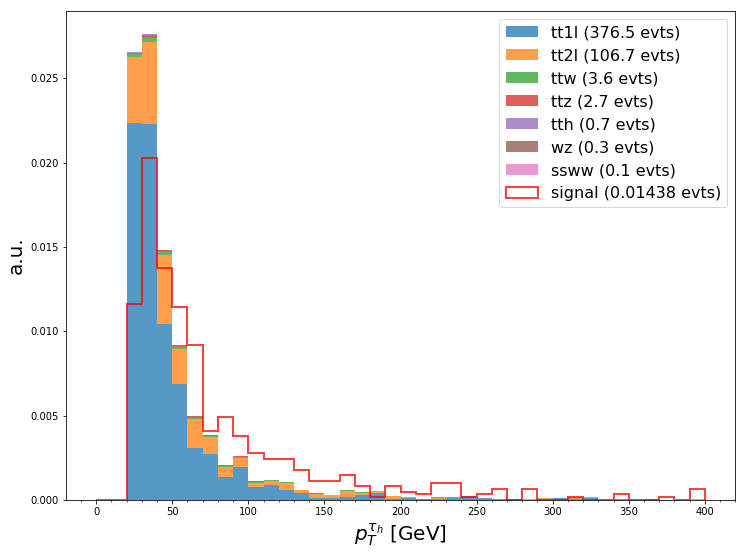

In [10]:
fig, axes = plt.subplots(figsize=(12,9))

plot_S_vs_B(
    tau_df, 
    "tau_pt", 
    tau_sig_selection,
    tau_bkg_selections,
    sig_label=r"signal",
    bkg_labels=tau_bkg_labels,
    bins=np.linspace(0,400,41),
    axes=axes,
    normalized=True
)
axes.set_xlabel(r"$p_{T}^{\tau_{h}}$ [GeV]", size=20);

sort_map = np.array([np.sum(tau_df[bkg].event_weight) for bkg in tau_bkg_selections]).argsort()[::-1]
sorted_tau_bkg_labels = np.array(tau_bkg_labels)[sort_map]
# bkg_order_map = dict(zip(tau_bkg_labels, bkg_order))

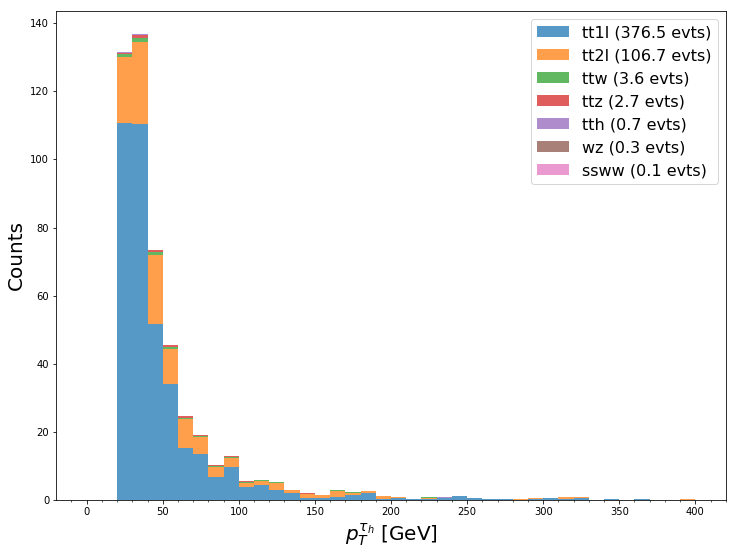

In [11]:
fig, axes = plt.subplots(figsize=(12,9))

plot_S_vs_B(
    tau_df, 
    "tau_pt", 
    None,
    tau_bkg_selections,
    bkg_labels=tau_bkg_labels,
    bins=np.linspace(0,400,41),
    axes=axes,
    normalized=False
)
axes.set_xlabel(r"$p_{T}^{\tau_{h}}$ [GeV]", size=20);

In [12]:
np.sum(tau_df[(~tau_df.is_signal) & (tau_df.tau_pt > 100)].event_weight)

39.862225

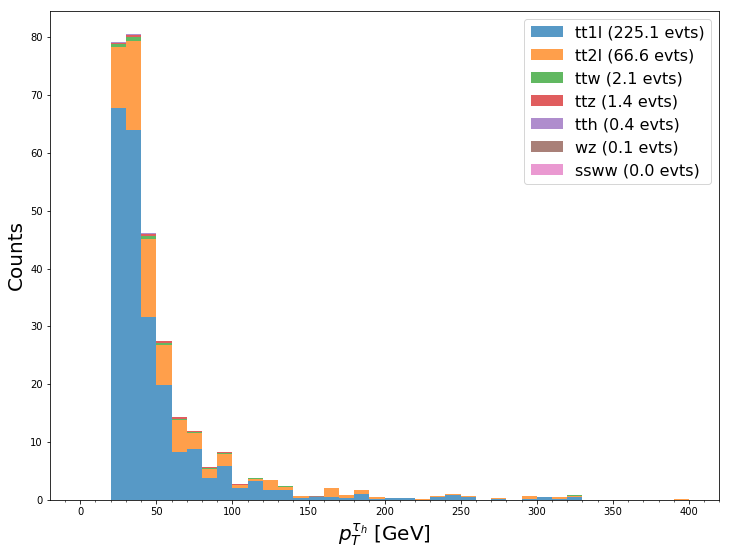

In [14]:
fig, axes = plt.subplots(figsize=(12,9))

is_mu_tau = tau_df.is_mu_tau

plot_S_vs_B(
    tau_df, 
    "tau_pt", 
    None,
    [bkg & is_mu_tau for bkg in tau_bkg_selections],
    bkg_labels=tau_bkg_labels,
    bins=np.linspace(0,400,41),
    axes=axes,
    normalized=False
)
axes.set_xlabel(r"$p_{T}^{\tau_{h}}$ [GeV]", size=20);

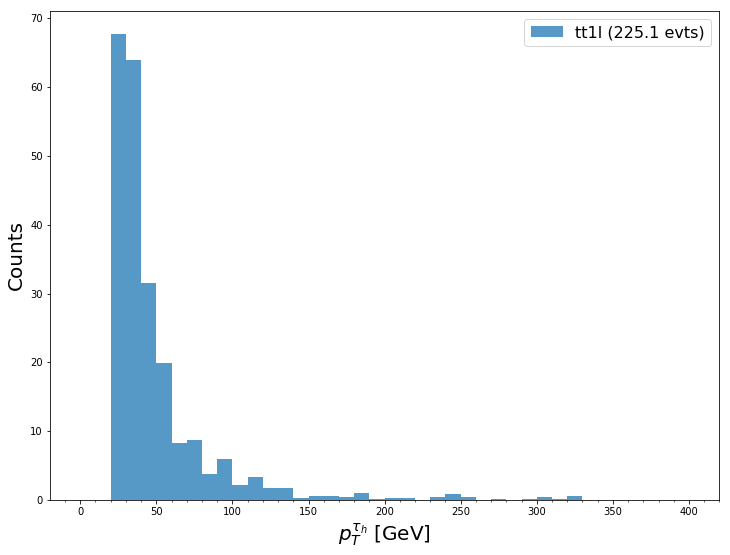

In [22]:
fig, axes = plt.subplots(figsize=(12,9))

is_mu_tau = tau_df.is_mu_tau & (tau_df.sample_name == "tt1l")

plot_S_vs_B(
    tau_df, 
    "tau_pt", 
    None,
    [tau_df.is_mu_tau & (tau_df.sample_name == "tt1l")],
    bkg_labels=["tt1l"],
    bins=np.linspace(0,400,41),
    axes=axes,
    normalized=False
)
axes.set_xlabel(r"$p_{T}^{\tau_{h}}$ [GeV]", size=20);

In [15]:
lep_sig_selection = lep_df.is_signal
lep_bkg_selections = []
lep_bkg_labels = []
for sample_name in lep_df[~lep_df.is_signal].sample_name.unique():
    lep_bkg_selections.append(lep_df.sample_name == sample_name)
    lep_bkg_labels.append(sample_name)

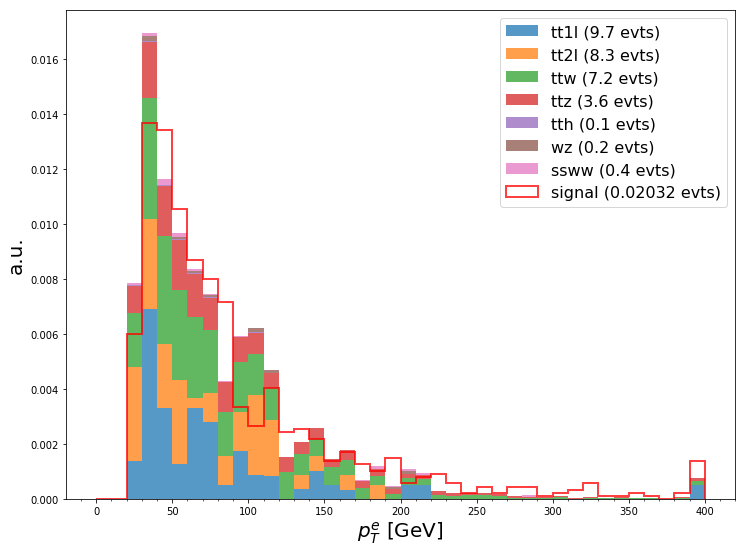

In [16]:
fig, axes = plt.subplots(figsize=(12,9))
is_mu_el = lep_df.is_mu_el

plot_S_vs_B(
    lep_df, 
    "el_pt", 
    lep_sig_selection & is_mu_el,
    [bkg & is_mu_el for bkg in lep_bkg_selections],
    sig_label=r"signal",
    bkg_labels=lep_bkg_labels,
    bkg_order=[lep_bkg_labels.index(l) for l in sorted_tau_bkg_labels],
    bins=np.linspace(0,400,41),
    axes=axes,
    normalized=True
)
axes.set_xlabel(r"$p_{T}^{e}$ [GeV]", size=20);

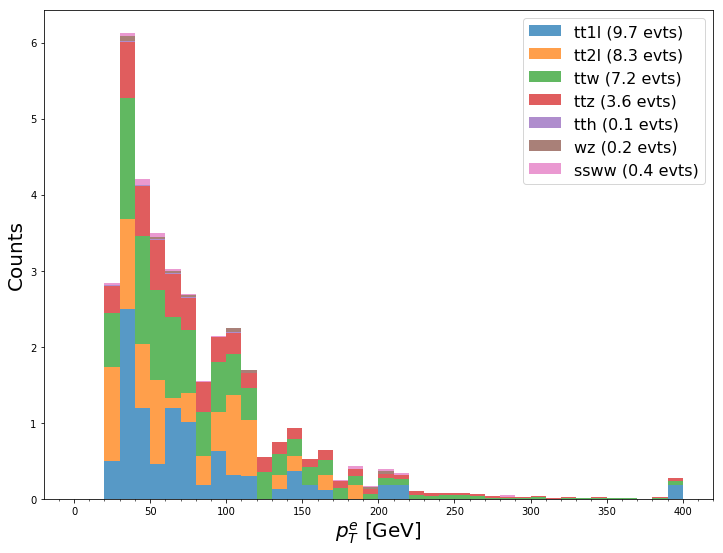

In [17]:
fig, axes = plt.subplots(figsize=(12,9))

is_mu_el = lep_df.is_mu_el

plot_S_vs_B(
    lep_df, 
    "el_pt", 
    None,
    [bkg & is_mu_el for bkg in lep_bkg_selections],
    sig_label=r"signal",
    bkg_labels=lep_bkg_labels,
    bkg_order=[lep_bkg_labels.index(l) for l in sorted_tau_bkg_labels],
    bins=np.linspace(0,400,41),
    axes=axes,
    normalized=False
)
axes.set_xlabel(r"$p_{T}^{e}$ [GeV]", size=20);

In [19]:
np.sum(lep_df[(~lep_df.is_signal) & (lep_df.el_pt > 100)].event_weight)

8.009756

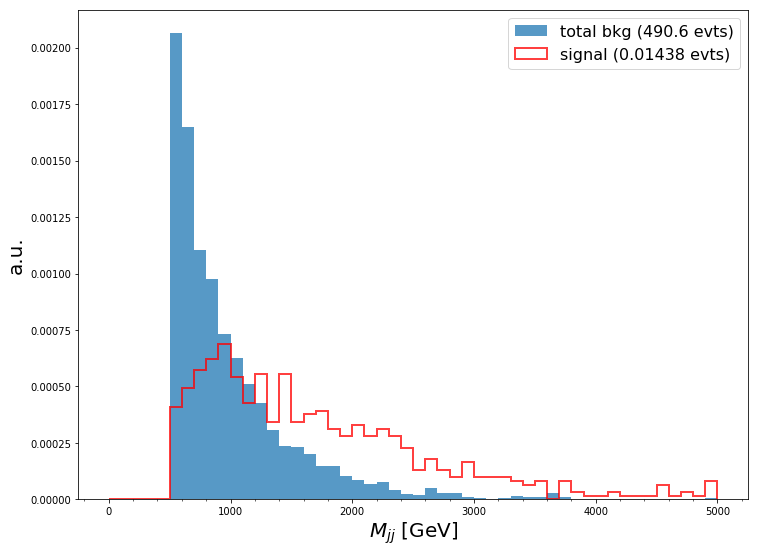

In [23]:
fig, axes = plt.subplots(figsize=(12,9))

plot_S_vs_B(
    tau_df, 
    "vbs_Mjj", 
    tau_df.is_signal,
    [~tau_df.is_signal],
    sig_label=r"signal",
    bkg_labels=["total bkg"],
    bins=np.linspace(0,5000,51),
    axes=axes,
    normalized=True
)
axes.set_xlabel(r"$M_{jj}$ [GeV]", size=20);

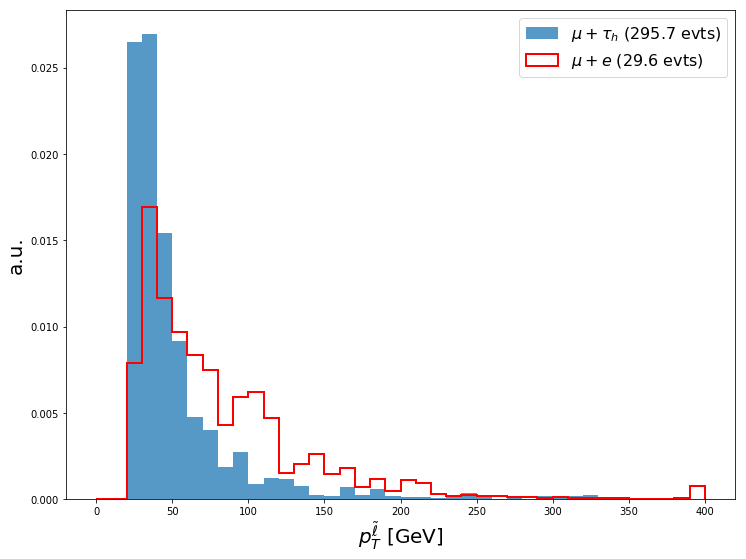

In [24]:
fig, axes = plt.subplots(figsize=(12,9))

bins = np.linspace(0, 400, 41)

tau_selection = (~tau_df.is_signal & tau_df.is_mu_tau)
axes.hist(
    np.clip(tau_df[tau_selection].tau_pt, bins[0], bins[-1]),
    weights=np.clip(tau_df[tau_selection].event_weight, bins[0], bins[-1]),
    bins=bins,
    density=True,
    label=r"$\mu+\tau_{{h}}$ ({:0.1f} evts)".format(np.sum(tau_df[tau_selection].event_weight)),
    alpha=0.75
);

lep_selection = (~lep_df.is_signal & lep_df.is_mu_el)
axes.hist(
    np.clip(lep_df[lep_selection].el_pt, bins[0], bins[-1]),
    weights=np.clip(lep_df[lep_selection].event_weight, bins[0], bins[-1]),
    color="r",
    bins=bins,
    density=True,
    label=r"$\mu+e$ ({:0.1f} evts)".format(np.sum(lep_df[lep_selection].event_weight)),
    histtype="step",
    linewidth=2
);
axes.legend(prop={"size": 16});

axes.set_ylabel("a.u.", size=20);
axes.set_xlabel(r"$p_{T}^{\tilde{\ell}}$ [GeV]", size=20);

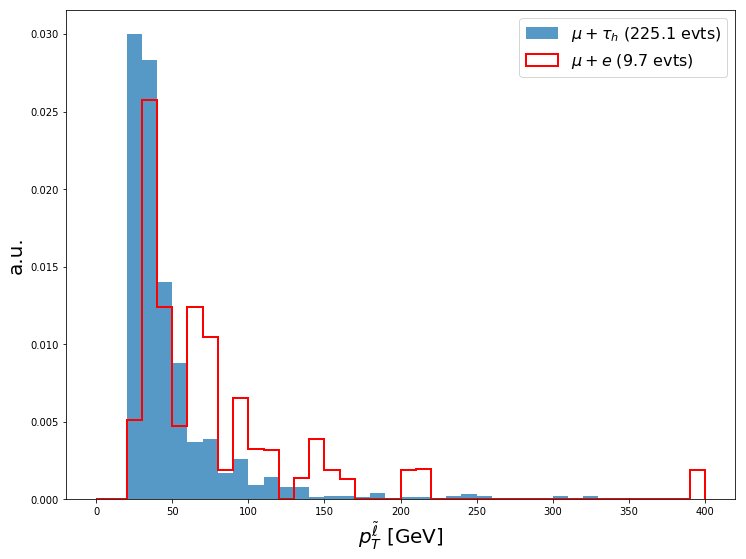

In [25]:
fig, axes = plt.subplots(figsize=(12,9))

bins = np.linspace(0, 400, 41)

tau_selection = (~tau_df.is_signal & tau_df.is_mu_tau & (tau_df.sample_name == "tt1l"))
axes.hist(
    np.clip(tau_df[tau_selection].tau_pt, bins[0], bins[-1]),
    weights=np.clip(tau_df[tau_selection].event_weight, bins[0], bins[-1]),
    bins=bins,
    density=True,
    label=r"$\mu+\tau_{{h}}$ ({:0.1f} evts)".format(np.sum(tau_df[tau_selection].event_weight)),
    alpha=0.75
);

lep_selection = (~lep_df.is_signal & lep_df.is_mu_el & (lep_df.sample_name == "tt1l"))
axes.hist(
    np.clip(lep_df[lep_selection].el_pt, bins[0], bins[-1]),
    weights=np.clip(lep_df[lep_selection].event_weight, bins[0], bins[-1]),
    color="r",
    bins=bins,
    density=True,
    label=r"$\mu+e$ ({:0.1f} evts)".format(np.sum(lep_df[lep_selection].event_weight)),
    histtype="step",
    linewidth=2
);
axes.legend(prop={"size": 16});

axes.set_ylabel("a.u.", size=20);
axes.set_xlabel(r"$p_{T}^{\tilde{\ell}}$ [GeV]", size=20);